In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [13]:
# Define the tide oscillation function
def tide_oscillation(t, amplitude, period, phase_shift, mean_level):
    omega = 2 * np.pi / period
    tide_height = amplitude * np.sin(omega * t + phase_shift) + mean_level
    return tide_height

In [14]:
# Load or define your data (example data used here)
# Assuming you have time (t) and tide height (y) data
# Replace with your actual data
t = np.linspace(0, 24, 100)  # Example time points
y = 2.0 * np.sin(2 * np.pi / 12.42 * t + np.pi/2) + 0.5 + np.random.normal(0, 0.25, size=len(t))  # Example noisy data

In [15]:
# Fit the model to the data
p0 = [1, 12, np.pi/2, 0.5]  # Initial guess for the parameters
popt, pcov = curve_fit(tide_oscillation, t, y, p0=p0)

# Extract the optimized parameters
amplitude_fit, period_fit, phase_shift_fit, mean_level_fit = popt

# Generate tide heights from the fitted parameters
y_fit = tide_oscillation(t, amplitude_fit, period_fit, phase_shift_fit, mean_level_fit)

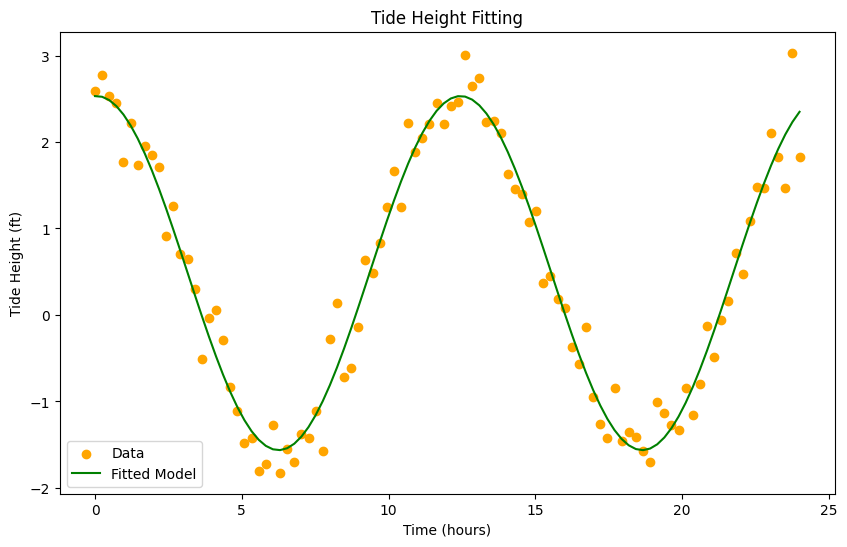

In [21]:
# Plot the data and the fitted model
plt.figure(figsize=(10, 6))
plt.scatter(t, y, label='Data', color='orange')
plt.plot(t, y_fit, label='Fitted Model', color='green')
plt.xlabel('Time (hours)')
plt.ylabel('Tide Height (ft)')
plt.title('Tide Height Fitting')
plt.legend()

# Save the figure as a PDF
plt.savefig('tide_fitting.pdf')

plt.show()

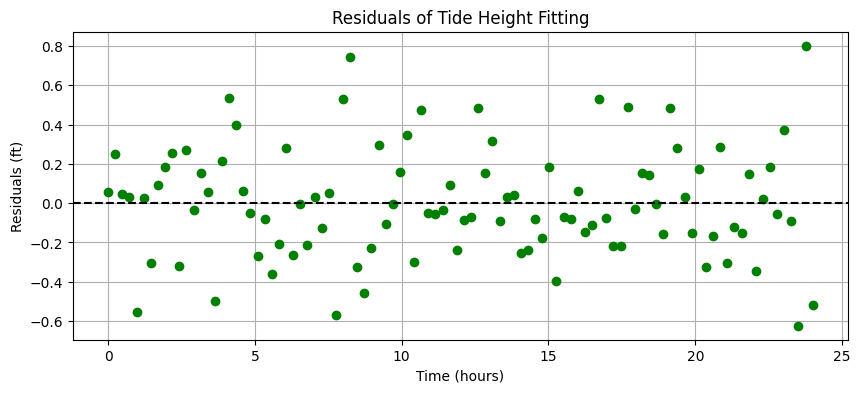

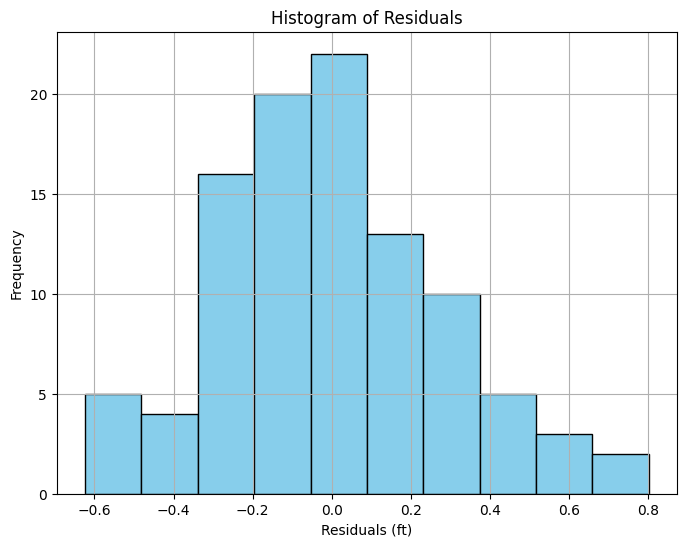

Standard Deviation of Residuals: 0.28188792719363653
Intrinsic Scatter (after accounting for measurement error): 0.1302336496360481


In [18]:
# Calculate residuals
residuals = y - y_fit

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(t, residuals, marker='o', linestyle='', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Residuals (ft)')
plt.title('Residuals of Tide Height Fitting')
plt.grid(True)

# Save the residuals plot as a PDF
plt.savefig('tide_residuals.pdf')

plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)

# Save the histogram as a PDF
plt.savefig('residuals_histogram.pdf')

plt.show()

# Calculate standard deviation of residuals
std_dev_residuals = np.std(residuals)
print("Standard Deviation of Residuals:", std_dev_residuals)

# Estimate intrinsic scatter after accounting for assumed measurement error
intrinsic_scatter = np.sqrt(std_dev_residuals**2 - 0.25**2)
print("Intrinsic Scatter (after accounting for measurement error):", intrinsic_scatter)

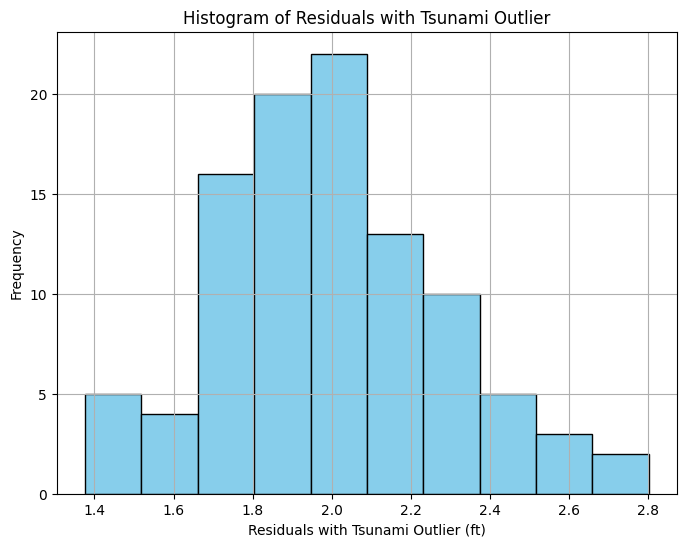

In [19]:
# Add tsunami outlier
y_outlier = y + 2.0  # Adding 2ft tsunami outlier to tide data

# Calculate residuals with outlier
residuals_outlier = y_outlier - tide_oscillation(t, *popt)

# Plot histogram with outlier
plt.figure(figsize=(8, 6))
plt.hist(residuals_outlier, bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Residuals with Tsunami Outlier (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Tsunami Outlier')
plt.grid(True)

# Save the histogram with outlier as a PDF
plt.savefig('residuals_histogram_with_outlier.pdf')

plt.show()